<a href="https://colab.research.google.com/github/chinmay002/Tensorflow_cert_progress/blob/main/TF_NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import   Sequential,Model
from tensorflow.keras.layers import Input,Dense
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import glob
import datetime

In [2]:
def plot_loss_curve(history):
  
  acc = history.history['accuracy']
  loss = history.history['loss']

  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']

  fig = plt.figure(figsize=(10,5))

  plt.subplot(221)
  plt.plot(acc,'bo--', label = "acc")
  plt.plot(val_acc,'ro--',label = 'val_acc')
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.title('acc vs val_acc')
  plt.legend()

  plt.subplot(222)
  plt.plot(loss,'bo--', label = "loss")
  plt.plot(val_loss,'ro--',label = 'val_acc')
  plt.ylabel('Loss')
  plt.xlabel('epochs')
  plt.title('loss vs val_loss')
  plt.legend()
  plt.show()

def unzip_data(file):
  zip_file = zipfile.ZipFile(file)
  zip_file.extractall()
  zip_file.close()


import datetime

def create_tensorboard_callback(dir_name,experiment_name):
  
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback



In [6]:
unzip_data("/content/nlp_getting_started.zip")

In [7]:
train = pd.read_csv('/content/train.csv').sample(frac=1)
train.head()

,id,keyword,location,text,target
1845,2655,crush,Kaneohe,@kuualohax more like you love your husband but...,0
7100,10173,violent%20storm,Worldwide,Violent Forces Radio: Now Playing Agony - Stor...,0
7336,10502,wildfire,NaN,#IDFire Parker Ridge Fact Sheet Aug 6 2015 (Pa...,1
3277,4703,epicentre,"Charlotte, NC",This Friday!!! Club Vault 3rd Floor EpiCentre ...,0
3469,4962,explosion,"London, UK",EE recalls Power Bar phone chargers after expl...,1


In [8]:
test = pd.read_csv('/content/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
import random
random_index = random.randint(0,len(train))
for row in train[['text','target']][random_index:random_index+5].itertuples():
  _, text , target = row
  print(f"Target: { target}", "(real disaster)" if target > 0 else "(not disaster)")
  print(f"Text:'\n{text}\n")
  print("---\n")


Target: 1 (real disaster)
Text:'
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/2AO97o2a9D

---

Target: 0 (not disaster)
Text:'
@crabbycale OH MY GOD THE MEMORIES ARE FLOODING BACK

---

Target: 1 (real disaster)
Text:'
Can't believe more people in their mid 20's don't have high blood pressure. Life is stressful. #DecisionsOnDecisions

---

Target: 0 (not disaster)
Text:'
I feel like that episode of Victorious when they all got trapped in an RV and almost died of heat stroke #MTVHottest One Direction

---

Target: 0 (not disaster)
Text:'
i wanna get a danger days tattoo so bad how cool would that spider look like on someones wrist or smth

---



In [11]:
from sklearn.model_selection import train_test_split
train_sent,val_sent,train_labels,val_labels = train_test_split(train['text'].to_numpy(),
                                                               train['target'].to_numpy(),
                                                               test_size=0.3,
                                                               random_state=22,
                                                               stratify = train['target'])

In [24]:
train_sent[:10]

array(["#TheaterShooting DEFENDANT/MASS MURDERER CHOSE NOT 2 TESTIFY IN FINAL PHASE 3 so he won't therefore B subject 2 cross-exam or jury questions",
       'Japan on Thursday marks the 70th anniversary of the atomic bombing of Hiroshima with the most senior official from Washington ever schedule\x89Û_',
       '@carolinagutierr grande twister!!!',
       "I'll cry until my pity party's in flames ????",
       'The Desolate Hope: Part 2: MIRAD: http://t.co/c6lGtOTVSF via @YouTube',
       'Obama Declares Disaster for Typhoon-Devastated Saipan',
       "Destruction magic's fine just don't go burning down any buildings.",
       "Training grains of wheat to bare gold in the August heat of their anger I'm the no trespass lest you seek danger.",
       '573 deaths have been certified by the Government as \x89Û÷nuclear disaster-related deaths\x89Ûª',
       "--thus making @FemaleGilgamesh's assault useless.\nThe spears collided with the dark force however did not penetrate.\n\nDue to the d

In [12]:
max_length = 15 
max_vocab = 10000
tv = layers.TextVectorization(max_tokens =max_vocab,
                              standardize = 'lower_and_strip_punctuation',
                              split = 'whitespace',
                              ngrams = None,
                              pad_to_max_tokens=True,
                              output_mode = 'int',
                              output_sequence_length = max_length)


In [69]:
sum([len(train_sent[i].split()) for i in range(len(train_sent))])/len(train_sent)


14.898667667479828

In [13]:
tv.adapt(train_sent)


In [71]:
#create a sample sentence and tokenize it
sample = "There's a flood asasdf "
tv([sample])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[388,   3, 224,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [67]:
tv.get_vocabulary()[:10]

['', '[UNK]']

In [ ]:
##creating Embedding using an Embedding layer

In [14]:
emb_layer = layers.Embedding(input_dim=max_vocab,output_dim= 128 ,
                             input_length =15)

In [15]:
random_text = random.choice(train_sent)
print(f"Original text {random_text}\n \
        \n\nEmbedded Version: ")
sample_embed = emb_layer(tv([random_text]))
print(sample_embed)

Original text Newberg upheaval: Jacque Betz responds 'looking forward to the day' she can answer questions #orcot #orpol http://t.co/dazQaMOO0C
         

Embedded Version: 
tf.Tensor(
[[[-0.03602502  0.04291851  0.04592652 ...  0.04048711  0.01448656
   -0.01102115]
  [-0.01751142 -0.02747001 -0.00506723 ...  0.03790666 -0.03414457
    0.02183649]
  [ 0.0492739   0.03715644  0.03058511 ...  0.03136529 -0.01010482
   -0.02658263]
  ...
  [ 0.04544077  0.00914863 -0.04586548 ... -0.02965926 -0.04337899
    0.02106838]
  [-0.02007803  0.02852919 -0.0321465  ... -0.00784155  0.04029981
    0.0352474 ]
  [ 0.00564983 -0.02022941 -0.04277683 ...  0.03306368  0.03089808
    0.01907113]]], shape=(1, 15, 128), dtype=float32)


In [75]:
sample_embed.shape

TensorShape([1, 15, 128])

**Model 0 : BaseLine using NaiveBayes and TFIDF**#

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ('tfidf',TfidfVectorizer()),
                     ('clf',MultinomialNB())
])

model_0.fit(train_sent,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [82]:
baseline_score = model_0.score(val_sent,val_labels)
print('Accuracy:',baseline_score)   

Accuracy: 0.7907180385288967


In [25]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

def calculate(y_true_,y_pred):
  acc = accuracy_score(y_true_,y_pred)
  f1 = f1_score(y_true_,y_pred)
  recall = recall_score(y_true_,y_pred)
  precision = precision_score(y_true_,y_pred)

  print('Recall: ', recall)
  print('precision: ', precision)
  print('f1: ', f1)
  print('accuracy: ', acc)

In [86]:
pred = model_0.predict(val_sent)
calculate(val_labels,pred)


Recall:  0.6126401630988787
precision:  0.8597997138769671
f1:  0.7154761904761905
accuracy:  0.7907180385288967


#Model1: Feed Forward Network

In [20]:
#create a tensorboard callback 
save_dir = 'model_logs'

In [106]:
inputs = Input(shape = (1,),dtype = tf.string)  #shape=(1,) one data at time
x = tv(inputs)
x = emb_layer(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_11 = tf.keras.Model(inputs,outputs,name = 'model_1')
model_11.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_5 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1921      
                                                                 
Total params: 1,281,921
Trainable params: 1,281,921
Non-trainable params: 0
_________________________________________________

In [107]:
for layer in model_11.layers:
  print(layer.get_output_shape_at(0))

(None, 1)
(None, 15)
(None, 15, 128)
(None, 1920)
(None, 1)


In [108]:
import datetime
model_11.compile(loss= 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam() ,metrics =['accuracy'])
history = model_11.fit(train_sent,train_labels,epochs=10,
                              validation_data=(val_sent,val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,'model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20230522-190118
Epoch 1/10
167/167 [==============================] - 4s 20ms/step - loss: 0.2325 - accuracy: 0.9657 - val_loss: 0.4988 - val_accuracy: 0.7605
Epoch 2/10
167/167 [==============================] - 5s 31ms/step - loss: 0.0645 - accuracy: 0.9852 - val_loss: 0.5396 - val_accuracy: 0.7636
Epoch 3/10
167/167 [==============================] - 4s 21ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.5710 - val_accuracy: 0.7583
Epoch 4/10
167/167 [==============================] - 4s 22ms/step - loss: 0.0387 - accuracy: 0.9848 - val_loss: 0.5982 - val_accuracy: 0.7623
Epoch 5/10
167/167 [==============================] - 4s 26ms/step - loss: 0.0347 - accuracy: 0.9848 - val_loss: 0.6186 - val_accuracy: 0.7544
Epoch 6/10
167/167 [==============================] - 4s 24ms/step - loss: 0.0347 - accuracy: 0.9833 - val_loss: 0.6367 - val_accuracy: 0.7570
Epoch 7/10
167/167 [==============================] - 5s 30ms/step -

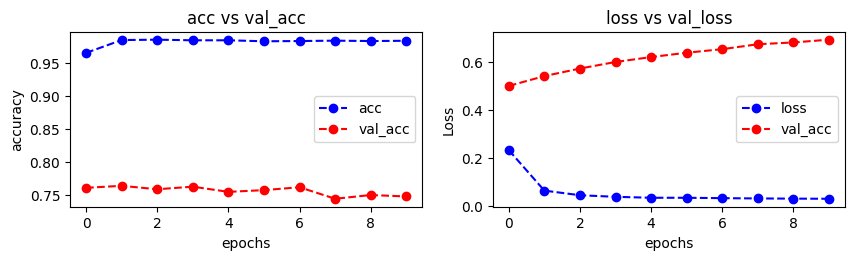

In [109]:
plot_loss_curve(history)

In [110]:
model_11.evaluate(val_sent,val_labels)  
#loss value, accuracy

72/72 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.7474


[0.6907877326011658, 0.7473730444908142]

In [113]:
model_1_pred = model_11.predict(val_sent)
model_1_pred.shape

72/72 [==============================] - 1s 6ms/step


(2284, 1)

In [115]:
model_1_pred = tf.squeeze(tf.round(model_1_pred))
model_1_pred

<tf.Tensor: shape=(2284,), dtype=float32, numpy=array([1., 0., 1., ..., 1., 0., 0.], dtype=float32)>

In [116]:
calculate(model_1_pred,val_labels)

Recall:  0.7091097308488613
precision:  0.6982670744138634
f1:  0.7036466358500256
accuracy:  0.7473730297723292


#Visualising learned embeddings

In [118]:
vocab = tv.get_vocabulary()
print(vocab[:10])

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']


In [123]:
emb_weights = model_11.get_layer('embedding_2').get_weights()[0]
emb_weights.shape

(10000, 128)

In [125]:
#create emb file
import io
out_v = io.open('vectors.tsv', 'w',encoding = 'utf-8')
out_m = io.open('metadata.tsv', 'w',encoding = 'utf-8')
for index,word in enumerate(vocab):
  if index ==0:
    continue
  vec = emb_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word+'\n')  
out_v.close()
out_m.close()

 # RNN,LSTM

In [130]:
inputs = Input(shape= (1,),dtype='string')
print(inputs.shape)
x = tv(inputs)
print(f'shape after vectorization {x.shape}')
x = emb_layer(x)
print(f'shape after embedding {x.shape}')
x = layers.LSTM(64,return_sequences = True)(x)
print(f'shape after LSTM 1st  {x.shape}')
x = layers.LSTM(64)(x)
print(f'shape after LSTM 2nd {x.shape}')
outputs = Dense(1,activation='sigmoid')(x)
model_2 = Model(inputs,outputs)
model_2.summary()

(None, 1)
shape after vectorization (None, 15)
shape after embedding (None, 15, 128)
shape after LSTM 1st  (None, 15, 64)
shape after LSTM 2nd (None, 64)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_5 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_8 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                     

In [132]:
model_2.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
history_lstm = model_2.fit(train_sent,train_labels,epochs=10,
                              validation_data=(val_sent,val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,'model_2_lstm')])

Saving TensorBoard log files to: model_logs/model_2_lstm/20230522-195712
Epoch 1/10
167/167 [==============================] - 18s 73ms/step - loss: 0.1809 - accuracy: 0.9341 - val_loss: 0.9372 - val_accuracy: 0.7382
Epoch 2/10
167/167 [==============================] - 9s 53ms/step - loss: 0.0778 - accuracy: 0.9730 - val_loss: 0.7784 - val_accuracy: 0.7666
Epoch 3/10
167/167 [==============================] - 9s 55ms/step - loss: 0.0550 - accuracy: 0.9769 - val_loss: 0.8126 - val_accuracy: 0.7579
Epoch 4/10
167/167 [==============================] - 9s 56ms/step - loss: 0.0405 - accuracy: 0.9820 - val_loss: 0.9877 - val_accuracy: 0.7482
Epoch 5/10
167/167 [==============================] - 8s 49ms/step - loss: 0.0336 - accuracy: 0.9844 - val_loss: 1.2429 - val_accuracy: 0.7496
Epoch 6/10
167/167 [==============================] - 9s 56ms/step - loss: 0.0354 - accuracy: 0.9839 - val_loss: 1.1172 - val_accuracy: 0.7369
Epoch 7/10
167/167 [==============================] - 9s 56ms/step -

In [134]:
print(model_2.evaluate(val_sent,val_labels))
model_2_pred = model_2.predict(val_sent)
model_2_pred = tf.squeeze(tf.round(model_2_pred))
calculate(model_2_pred,val_labels)

72/72 [==============================] - 1s 18ms/step - loss: 1.8200 - accuracy: 0.7294
[1.8199551105499268, 0.7294220924377441]
72/72 [==============================] - 1s 8ms/step
Recall:  0.6763848396501457
precision:  0.709480122324159
f1:  0.6925373134328358
accuracy:  0.7294220665499125


#Model 3: GRU

In [18]:
inputs = Input(shape= (1,),dtype='string')
print(inputs.shape)
x = tv(inputs)
print(f'shape after vectorization {x.shape}')
x = emb_layer(x)
print(f'shape after embedding {x.shape}')
#x = layers.GRU(64,return_sequences = True)(x)
print(f'shape after LSTM 1st  {x.shape}')
x = layers.GRU(64)(x)
print(f'shape after LSTM 2nd {x.shape}')
outputs = Dense(1,activation='sigmoid')(x)
model_3 = Model(inputs,outputs)
model_3.summary()

(None, 1)
shape after vectorization (None, 15)
shape after embedding (None, 15, 128)
shape after LSTM 1st  (None, 15, 128)
shape after LSTM 2nd (None, 64)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                    

In [23]:
model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
history_gru = model_3.fit(train_sent,train_labels,epochs=10,
                              validation_data=(val_sent,val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230522-221144
Epoch 1/10
167/167 [==============================] - 10s 41ms/step - loss: 0.1797 - accuracy: 0.9249 - val_loss: 0.8209 - val_accuracy: 0.7456
Epoch 2/10
167/167 [==============================] - 7s 45ms/step - loss: 0.0618 - accuracy: 0.9792 - val_loss: 0.7590 - val_accuracy: 0.7369
Epoch 3/10
167/167 [==============================] - 6s 39ms/step - loss: 0.0463 - accuracy: 0.9801 - val_loss: 1.1530 - val_accuracy: 0.7404
Epoch 4/10
167/167 [==============================] - 8s 45ms/step - loss: 0.0334 - accuracy: 0.9846 - val_loss: 1.3440 - val_accuracy: 0.7447
Epoch 5/10
167/167 [==============================] - 8s 49ms/step - loss: 0.0322 - accuracy: 0.9850 - val_loss: 1.4667 - val_accuracy: 0.7338
Epoch 6/10
167/167 [==============================] - 8s 49ms/step - loss: 0.0350 - accuracy: 0.9825 - val_loss: 1.2259 - val_accuracy: 0.7264
Epoch 7/10
167/167 [==============================] - 8s 48ms/step - 

In [26]:
print(model_3.evaluate(val_sent,val_labels))
model_3_pred = model_3.predict(val_sent)
model_3_pred = tf.squeeze(tf.round(model_3_pred))
calculate(model_3_pred,val_labels)

72/72 [==============================] - 0s 5ms/step - loss: 1.4407 - accuracy: 0.7487
[1.440698504447937, 0.7486864924430847]
72/72 [==============================] - 0s 5ms/step
Recall:  0.7158006362672322
precision:  0.6880733944954128
f1:  0.7016632016632017
accuracy:  0.7486865148861647


# Model 4: CNN+RNN

In [34]:
embbeding_test = emb_layer(tv(['this is lot more to take']))
print(embbeding_test.shape)
conv_1d = layers.Conv1D(filters = 32 , kernel_size = 5 , activation = 'relu', padding = 'same')
conv_1d_output = conv_1d(embbeding_test)
print(conv_1d_output.shape)
max_pool = layers.GlobalAveragePooling1D()
max_pool_output = max_pool(conv_1d_output)
print(f'after max_pooling {max_pool_output.shape}')

(1, 15, 128)
(1, 15, 32)
after max_pooling (1, 32)


In [31]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.03508126, 0.0230141 , 0.02771521, 0.05257925, 0.00696143,
        0.00329137, 0.01977537, 0.00192625, 0.02817536, 0.01015444,
        0.03850311, 0.0019046 , 0.02092221, 0.01030509, 0.03265837,
        0.05517326, 0.00463993, 0.03192202, 0.01709635, 0.01520239,
        0.0158956 , 0.02349227, 0.02504365, 0.01048205, 0.01706977,
        0.01787062, 0.01316416, 0.00175798, 0.0249137 , 0.00220846,
        0.00920465, 0.01994438]], dtype=float32)>

In [37]:
from keras.api._v2.keras import activations
#create 1-d layer
inputs = Input(shape= (1,),dtype='string')
print(inputs.shape)
x = tv(inputs)
print(f'shape after vectorization {x.shape}')

x = emb_layer(x)
print(f'shape after embedding {x.shape}')

x = layers.Conv1D(filters =64 ,kernel_size = 5 ,padding = 'same',activation='relu')(x)
print(f'shape after conv1D 2nd {x.shape}')

x = layers.GlobalMaxPool1D()(x)
outputs = Dense(1,activation='sigmoid')(x)
model_4 = Model(inputs,outputs)
model_4.summary()

(None, 1)
shape after vectorization (None, 15)
shape after embedding (None, 15, 128)
shape after conv1D 2nd (None, 15, 64)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_6 (Conv1D)           (None, 15, 64)            41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
  

In [38]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
history_conv = model_4.fit(train_sent,train_labels,epochs=10,
                              validation_data=(val_sent,val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,'model_3_conv')])

Saving TensorBoard log files to: model_logs/model_3_conv/20230522-223702
Epoch 1/10
167/167 [==============================] - 6s 31ms/step - loss: 0.1401 - accuracy: 0.9688 - val_loss: 0.8685 - val_accuracy: 0.7430
Epoch 2/10
167/167 [==============================] - 4s 24ms/step - loss: 0.0572 - accuracy: 0.9822 - val_loss: 1.0098 - val_accuracy: 0.7408
Epoch 3/10
167/167 [==============================] - 5s 27ms/step - loss: 0.0438 - accuracy: 0.9840 - val_loss: 1.1215 - val_accuracy: 0.7386
Epoch 4/10
167/167 [==============================] - 5s 27ms/step - loss: 0.0420 - accuracy: 0.9840 - val_loss: 1.1370 - val_accuracy: 0.7395
Epoch 5/10
167/167 [==============================] - 5s 32ms/step - loss: 0.0392 - accuracy: 0.9824 - val_loss: 1.1307 - val_accuracy: 0.7408
Epoch 6/10
167/167 [==============================] - 5s 30ms/step - loss: 0.0370 - accuracy: 0.9831 - val_loss: 1.1579 - val_accuracy: 0.7395
Epoch 7/10
167/167 [==============================] - 5s 30ms/step - 

In [40]:
print(model_4.evaluate(val_sent,val_labels))
model_4_pred = model_4.predict(val_sent)
model_4_pred = tf.squeeze(tf.round(model_4_pred))
calculate(model_4_pred,val_labels)

72/72 [==============================] - 0s 4ms/step - loss: 1.2412 - accuracy: 0.7360
[1.2411848306655884, 0.735989511013031]
72/72 [==============================] - 0s 3ms/step
Recall:  0.6940451745379876
precision:  0.6890927624872579
f1:  0.6915601023017903
accuracy:  0.7359894921190894


# Transfer Learning

In [43]:
sample_sent = 'getting emb from tensorflow from the hub to test embeddings'

In [46]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')


In [48]:
embed_samples = embed([sample_sent])

In [49]:
embed_samples

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.01138486, -0.01672327, -0.02860833, -0.0825337 ,  0.00614455,
        -0.00380579,  0.03867117, -0.0219191 ,  0.00978584,  0.08064254,
        -0.04822609,  0.01612809,  0.05350494,  0.04545963, -0.01893891,
         0.08785636,  0.01614096, -0.0768808 ,  0.05144043,  0.0211668 ,
        -0.06401593, -0.0076989 , -0.00831262,  0.06397573,  0.03379169,
         0.0535719 , -0.05455587,  0.02933102, -0.01418055,  0.03905835,
        -0.01599538, -0.03244713, -0.04446892,  0.05364931, -0.04719144,
         0.02437988, -0.06727277, -0.01718312, -0.01396491,  0.04000387,
         0.00529985,  0.07592711, -0.0079187 , -0.01617762,  0.08496899,
         0.03039993, -0.04900959, -0.04672401,  0.0501508 ,  0.05813691,
        -0.07480127, -0.001275  ,  0.07852298,  0.00634277, -0.05348843,
        -0.07936764, -0.04954092, -0.00191783, -0.00473801,  0.06246899,
        -0.06732973,  0.00915539, -0.02670949,  0.02723817, -0.06715828,
 

In [51]:
#create a Keras Layer using pretrained layer ftom tensorflow hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape = [],
                                        dtype = tf.string,
                                        name = 'USE')


In [53]:
model_5 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(64,activation = 'relu')
    layers.Dense(1,activation='sigmoid')
])

model_5.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
history_use = model_5.fit(train_sent,train_labels,epochs=10,
                              validation_data=(val_sent,val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,'model_5_use')])

Saving TensorBoard log files to: model_logs/model_5_use/20230522-225837
Epoch 1/10
167/167 [==============================] - 8s 27ms/step - loss: 0.6612 - accuracy: 0.7082 - val_loss: 0.6301 - val_accuracy: 0.7627
Epoch 2/10
167/167 [==============================] - 3s 20ms/step - loss: 0.6022 - accuracy: 0.7857 - val_loss: 0.5841 - val_accuracy: 0.7745
Epoch 3/10
167/167 [==============================] - 3s 20ms/step - loss: 0.5603 - accuracy: 0.7925 - val_loss: 0.5516 - val_accuracy: 0.7806
Epoch 4/10
167/167 [==============================] - 3s 17ms/step - loss: 0.5303 - accuracy: 0.7970 - val_loss: 0.5281 - val_accuracy: 0.7815
Epoch 5/10
167/167 [==============================] - 4s 24ms/step - loss: 0.5082 - accuracy: 0.8011 - val_loss: 0.5109 - val_accuracy: 0.7824
Epoch 6/10
167/167 [==============================] - 3s 20ms/step - loss: 0.4915 - accuracy: 0.8028 - val_loss: 0.4980 - val_accuracy: 0.7811
Epoch 7/10
167/167 [==============================] - 4s 25ms/step - l

In [54]:
print(model_5.evaluate(val_sent,val_labels))
model_5_pred = model_5.predict(val_sent)
model_5_pred = tf.squeeze(tf.round(model_5_pred))
calculate(model_5_pred,val_labels)

72/72 [==============================] - 2s 22ms/step - loss: 0.4682 - accuracy: 0.7890
[0.4682352542877197, 0.788966715335846]
72/72 [==============================] - 1s 11ms/step
Recall:  0.7634635691657867
precision:  0.7370030581039755
f1:  0.7499999999999999
accuracy:  0.7889667250437828


In [55]:
model_5_1 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation = 'relu'),
    layers.Dense(1,activation='sigmoid')
])

model_5_1.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
history_use = model_5_1.fit(train_sent,train_labels,epochs=15,
                              validation_data=(val_sent,val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,'model_5_use')])

Saving TensorBoard log files to: model_logs/model_5_use/20230522-230132
Epoch 1/15
167/167 [==============================] - 6s 27ms/step - loss: 0.5243 - accuracy: 0.7788 - val_loss: 0.4459 - val_accuracy: 0.8008
Epoch 2/15
167/167 [==============================] - 3s 21ms/step - loss: 0.4193 - accuracy: 0.8118 - val_loss: 0.4305 - val_accuracy: 0.8082
Epoch 3/15
167/167 [==============================] - 3s 21ms/step - loss: 0.4019 - accuracy: 0.8242 - val_loss: 0.4288 - val_accuracy: 0.8060
Epoch 4/15
167/167 [==============================] - 4s 22ms/step - loss: 0.3928 - accuracy: 0.8262 - val_loss: 0.4252 - val_accuracy: 0.8109
Epoch 5/15
167/167 [==============================] - 4s 23ms/step - loss: 0.3841 - accuracy: 0.8352 - val_loss: 0.4240 - val_accuracy: 0.8122
Epoch 6/15
167/167 [==============================] - 3s 18ms/step - loss: 0.3785 - accuracy: 0.8354 - val_loss: 0.4261 - val_accuracy: 0.8113
Epoch 7/15
167/167 [==============================] - 4s 21ms/step - l

In [56]:
print(model_5_1.evaluate(val_sent,val_labels))
model_5_1_pred = model_5.predict(val_sent)
model_5_1_pred = tf.squeeze(tf.round(model_5_1_pred))
calculate(model_5_1_pred,val_labels)

72/72 [==============================] - 2s 21ms/step - loss: 0.4347 - accuracy: 0.8152
[0.4347124695777893, 0.8152364492416382]
72/72 [==============================] - 1s 16ms/step
Recall:  0.7634635691657867
precision:  0.7370030581039755
f1:  0.7499999999999999
accuracy:  0.7889667250437828


#Model 7:TFHUB Pretrained USE but 10% data

In [59]:
#10% of training data
train_10 =train[['text','target']].sample(frac = 1,random_state=42)
train_sent_10 = train_10['text']
train_label_10 = train_10['target']

In [60]:
train_sent_10

3020    DUST IN THE WIND: @82ndABNDIV paratroopers mov...
5837    #360WiseNews : China's Stock Market Crash: Are...
3073    Achievement Unlocked: Replaced Light Socket; D...
4882    I just bought tickets to DEATH BED / DUDE BRO ...
6842    Hollywood movie about trapped miners released ...
                              ...                        
5816    Turning rubble from disasters into 'Lego' bric...
2900       @Lwilliams_13 I'll drown you in the river walk
814     New print available on http://t.co/ucy5fEA9yu!...
325     Vladimir Putin Issues Major Warning But Is It ...
1718    My @MLG and food worlds have collided in this ...
Name: text, Length: 7613, dtype: object

In [ ]:
#to build like same prev model we use clone_model()
#clone_model creates a new inputs, layers and weights instead of sharing the wieghs for diff inp


In [61]:
model_6 = tf.keras.models.clone_model(model_5_1)

model_6.compile(loss ='binary_crossentropy' ,optimizer = 'adam',metrics = ['accuracy'] )
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [62]:
history_6 = model_6.fit(train_sent,train_labels,epochs=15,
                              validation_data=(val_sent,val_labels),
                              callbacks = [create_tensorboard_callback(save_dir,'model_6_use')])

Saving TensorBoard log files to: model_logs/model_6_use/20230522-232735
Epoch 1/15
167/167 [==============================] - 7s 24ms/step - loss: 0.5207 - accuracy: 0.7810 - val_loss: 0.4519 - val_accuracy: 0.7920
Epoch 2/15
167/167 [==============================] - 4s 24ms/step - loss: 0.4203 - accuracy: 0.8107 - val_loss: 0.4346 - val_accuracy: 0.8034
Epoch 3/15
167/167 [==============================] - 3s 17ms/step - loss: 0.4029 - accuracy: 0.8229 - val_loss: 0.4309 - val_accuracy: 0.8078
Epoch 4/15
167/167 [==============================] - 3s 21ms/step - loss: 0.3922 - accuracy: 0.8275 - val_loss: 0.4280 - val_accuracy: 0.8113
Epoch 5/15
167/167 [==============================] - 4s 23ms/step - loss: 0.3840 - accuracy: 0.8315 - val_loss: 0.4282 - val_accuracy: 0.8087
Epoch 6/15
167/167 [==============================] - 4s 21ms/step - loss: 0.3775 - accuracy: 0.8366 - val_loss: 0.4256 - val_accuracy: 0.8144
Epoch 7/15
167/167 [==============================] - 3s 17ms/step - l

In [63]:
print(model_6.evaluate(val_sent,val_labels))
model_6_pred = model_6.predict(val_sent)
model_6_pred = tf.squeeze(tf.round(model_6_pred))
calculate(model_6_pred,val_labels)

72/72 [==============================] - 1s 11ms/step - loss: 0.4344 - accuracy: 0.8148
[0.4343625605106354, 0.8147985935211182]
72/72 [==============================] - 1s 11ms/step
Recall:  0.8148984198645598
precision:  0.7359836901121305
f1:  0.7734333154793787
accuracy:  0.8147985989492119


In [64]:
calculate(model_5_1_pred,val_labels)

Recall:  0.7634635691657867
precision:  0.7370030581039755
f1:  0.7499999999999999
accuracy:  0.7889667250437828


# Uploading out model Training 

In [65]:
!tensorboard dev upload --logdir ./model_logs/ \
--name 'NLP modelling'\
--description 'comparing different typr of model achitecture' \
--one_shot 

2023-05-23 00:00:18.098875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   SNRK-FZHG



New experiment created. View your TensorBoard at: https://tensorboard.dev/experime

In [66]:
#to delete exp
#!tensorboard dev list
#!tensorflow dev delete --experiment_id {ID}

2023-05-23 00:02:26.751535: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/sbDUWnulQQm7y4iMQWOjvg/
	Name                 NLP modelling
	Description          comparing different typr of model achitecture
	Id                   sbDUWnulQQm7y4iMQWOjvg
	Created              2023-05-23 00:00:49 (1 minute ago)
	Updated              2023-05-23 00:00:55 (1 minute ago)
	Runs                 12
	Tags                 5
	Scalars              420
	Tensor bytes         0
	Binary object bytes  3359135
https://tensorboard.dev/experiment/FlxW0R8BSrqfJXA8kqe43Q/
	Name                 Fine-tuning EfficientNetB0 on all Food101 Data
	Description          Training results for fine-tuning EfficientNetB0 on Food101 Data with learning rate 0.0001
	Id                   FlxW0R8BSrqfJXA8kqe43Q
	Created              2023-05-14 19:08:48
	Updated              2023-05-14 19:08:50
	Runs                 4
	Tags                 5
	Scalars